<a href="https://colab.research.google.com/github/Hairychest/sparks-manaidu-codes/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#name : Masavarapu AppalaNaidu


In [37]:
!wget https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv


--2023-04-19 18:33:19--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘student_scores - student_scores.csv.1’

student_scores - st 100%[===================>]     212  --.-KB/s    in 0s      

2023-04-19 18:33:19 (10.0 MB/s) - ‘student_scores - student_scores.csv.1’ saved [212/212]



In [38]:
#importing required libraries
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [39]:
dataset = pd.read_csv('/content/student_scores - student_scores.csv')
print(dataset.head())
print('number of training data',len(dataset))
print('number of features',dataset.shape[1]-1)

#creating test dataset
test_dataset = pd.DataFrame({'Hours':[9.25]})
print(test_dataset.head())


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
number of training data 25
number of features 1
   Hours
0   9.25


In [40]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


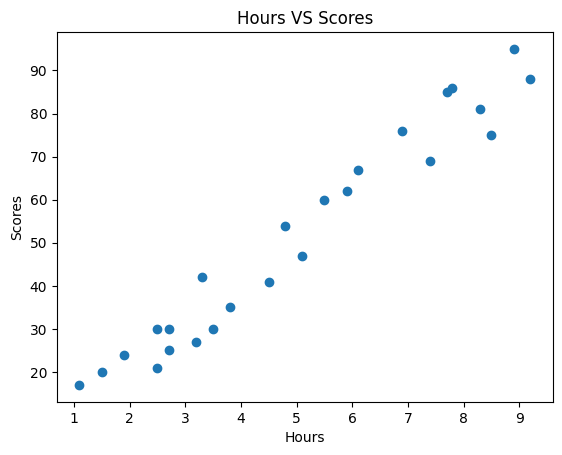

In [41]:
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.show()

In [42]:
#instantiate linear model
lr = LinearRegression()
lr.fit(dataset['Hours'].values.reshape(-1,1),dataset['Scores'].values.reshape(-1,1))


#metrics on train data
print('RMSE on training data for LinearRegression',mean_squared_error(dataset['Scores'].values.reshape(-1,1),lr.predict(dataset['Hours'].values.reshape(-1,1)),squared=False))

#predicting
print('Prediction using LinearRegression',round(lr.predict(test_dataset.values.reshape(-1,1))[0,0]))


RMSE on training data for LinearRegression 5.374265578592619
Prediction using LinearRegression 93


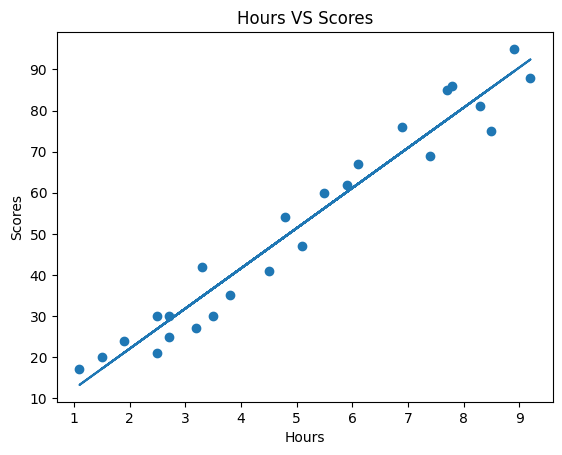

In [43]:
plt.plot(dataset['Hours'],(lr.coef_[0][0]*dataset['Hours']+lr.intercept_[0]))
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.show()

In [44]:
#instantiate Lasso model
ls = Lasso()
ls.fit(dataset['Hours'].values.reshape(-1,1),dataset['Scores'].values.reshape(-1,1))

#metrics on train data
print('RMSE on training data for Lasso',mean_squared_error(dataset['Scores'].values.reshape(-1,1),ls.predict(dataset['Hours'].values.reshape(-1,1)),squared=False))

#predicting
print('Prediction using Lasso',round(ls.predict(test_dataset.values.reshape(-1,1))[0]))


RMSE on training data for Lasso 5.389443478935067
Prediction using Lasso 92


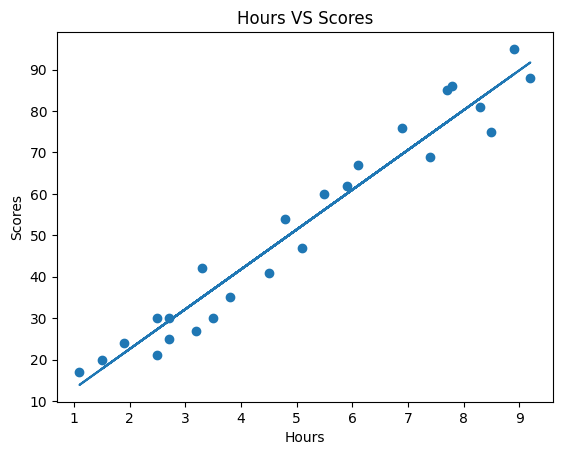

In [46]:
plt.plot(dataset['Hours'],(ls.coef_[0]*dataset['Hours']+ls.intercept_[0]))
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.show()

In [47]:
#instantiate Ridge model
rd = Ridge()
rd.fit(dataset['Hours'].values.reshape(-1,1),dataset['Scores'].values.reshape(-1,1))

#metrics on train data
print('RMSE on training data for Ridge',mean_squared_error(dataset['Scores'].values.reshape(-1,1),rd.predict(dataset['Hours'].values.reshape(-1,1)),squared=False))

#predicting
print('Prediction using Ridge',round(rd.predict(test_dataset.values.reshape(-1,1))[0,0]))

RMSE on training data for Ridge 5.376559080793204
Prediction using Ridge 93


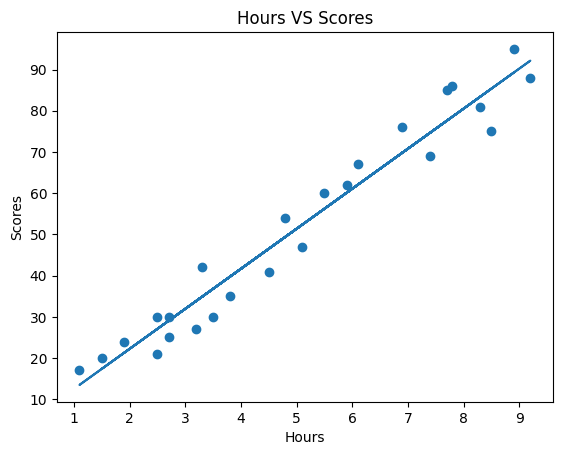

In [48]:
plt.plot(dataset['Hours'],(rd.coef_[0][0]*dataset['Hours']+rd.intercept_[0]))
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.show()

In [49]:
# RMSE is low in case of Linear Regression, so we only use that model on testset
print('prediction using final model on testset ',round(lr.predict(test_dataset.values.reshape(-1,1))[0,0]))

prediction using final model on testset  93
